## **Identifying High-Potential Film Investments**
____________________

# **Our Business Problem**

We want to better identify the features of film projects with high revenue potential and commercial appeal. Utilizing data sets with variables such as genre, director, actors, and budget we want to be able to assess which variables have the highest correlation with gross revenue and rating. This system can be used by film production studios to determine whether a film project is a viable investment.


# **Data**

We will be using two data sets for this project.

**Data Set 1:**

The data for the variables we will be using were downloaded from Kaggle: 

https://www.kaggle.com/datasets/danielgrijalvas/movies



The dataset includes 6,820 movies with the following variables for each:

*   **budget**: the budget of a movie. Some movies don't have this, so it appears as 0
*   **company**: the production company
*   **country**: country of origin
*   **director**: the director
*   **genre**: main genre of the movie.
*   **gross**: revenue of the movie
*   **name**: name of the movie
*   **rating**: rating of the movie (R, PG, etc.)
*   **released**: release date (YYYY-MM-DD)
*   **runtime**: duration of the movie
*   **score**: IMDb user rating
*   **votes**: number of user votes
*   **star**: main actor/actress
*   **writer**: writer of the movie
*   **year**: year of release

**Data Set 2:**

The data for each film's financial information were pulled from The Numbers: 

https://www.the-numbers.com/movie/budgets/all

The dataset includes the movie's release date, title, production budget, domestic gross revenue, and worldwide gross revenue.

## **Initial Thoughts and Predictions Prior to Data Analysis**

There are likely a few variables that have a high correlation with revenue.

*   Budget is likely a clear indication of projected revenue, but we may want to exclude budget from certain data sets to better project the types of movies that are successful.
*   Directors are also a likely indicator of success since there are going to be some directors that are automatically given higher budgets for projects; however, the director-level data may be very granular and difficult to derive insights from. 
*   Production companies could also be an indicator of success since the larger production companies will have greater reach with their marketing and distribution capbilities. 

There are also going to be a few variables that have little to no correlation with revenue.
*   Variables such as the name of the film or the runtime will likely have no correlation with revenue.
*   The IMDB Score may be a variable that has a surprisingly minimal impact on the revenue of the film because of comedies that receive poor reviews despite performing well at the box office. Furthermore, this varable may be self-reinforcing, as a movie getting bad reviews will keep otherwise intrested parties from seeing the movie. 

Most variables will have a small correlation with revenue, but all of the variables together should lead to a strong predictor of future revenues.
*   Variables such as the year the movie was released, genre, and country of origin may not have a strong correlation with revenue alone, but combined these variables will have a strong correlation coefficient.

Finally, in the event we are unable to get a strong correlation or prediction, we will try and understand the factors that are driving those predictions. 

In [ ]:
# Load libraries and data

# Initial library imports
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

# Load the two csv files, "movie_budgeting.csv" and "movies.csv", via github
# Set the index for each dataframe to be the movie title, so they can be joined  
url1 = 'https://raw.githubusercontent.com/nordbynick/IS833D1_GroupProject/main/movie_budgeting.csv'
url2 = 'https://raw.githubusercontent.com/nordbynick/IS833D1_GroupProject/main/movies.csv'
df1 = pd.read_csv(url1).set_index("Movie")
df2 = pd.read_csv(url2).set_index("name") 

# Mount the Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Review data in df1 (Part 1/2)
df1.head(3)

,Rank,Release Date,Production Budget,Domestic Gross,Worldwide Gross
Movie,,,,,
Avengers: Endgame,1,4/23/2019,400000000,858373000,2797800564
Pirates of the Caribbean: On Stranger Tides,2,5/20/2011,379000000,241071802,1045713802
Avengers: Age of Ultron,3,4/22/2015,365000000,459005868,1395316979


In [ ]:
# Review data in df1 (Part 2/2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, Avengers: Endgame to Birds of Prey (And the Fantabulous Emancipation…
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               600 non-null    int64 
 1   Release Date       600 non-null    object
 2   Production Budget  600 non-null    object
 3   Domestic Gross     600 non-null    object
 4   Worldwide Gross    600 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.1+ KB


In [ ]:
# Review data in df2 (Part 1/2)
df2.head(3)

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
Longshot,TV-PG,Comedy,1981,1/1/1980,5.1,101.0,E.W. Swackhamer,Barry Rosen,Leif Garrett,United States,NaN,NaN,Greentree,100.0
Five Days One Summer,PG,Drama,1982,1/1/1982,6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,15000000.0,199078.0,Cable and Wireless Finance,108.0
Taipei Story,Not Rated,Drama,1985,1/1/1985,7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0


In [ ]:
# Review data in df2 (Part 2/2)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, Longshot to The Wolfman
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7591 non-null   object 
 1   genre     7668 non-null   object 
 2   year      7668 non-null   int64  
 3   released  7666 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   float64
 6   director  7668 non-null   object 
 7   writer    7665 non-null   object 
 8   star      7667 non-null   object 
 9   country   7665 non-null   object 
 10  budget    5497 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7651 non-null   object 
 13  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 898.6+ KB


Because we want a robust dataset that includes information on worldwide and domestic revenue, along with other features, we need to join 'movie_budgeting.csv' with 'movies.csv'. While joining the data in this direction creates a smaller dataset, it is rich with information. 

In [ ]:
## BEGIN DATA PREPARATION AND CLEANING ##

# Join the two dfs
df = df1.join(df2)

# Then drop "Rank" and "Release Date" from the new dataframe, because they are not necessary for our analysis 
df = df.drop(columns=["Rank","Release Date"])

# Then debug the "Domestic Gross" & "Worldwide Gross" columns 
# They have several characters that needed to be removed (\xa0)
# Then change their data type to be float
df["Domestic Gross"]=df["Domestic Gross"].str.replace("\xa0", "").astype(float)
df["Worldwide Gross"]=df["Worldwide Gross"].str.replace("\xa0", "").astype(float)
df["Production Budget"]=df["Production Budget"].astype(float)

# **Linear Regression: Can We Use Genre to Predict Movie Revenue?**
In trying to identify high potental revenue films, we first want to see if we can use the genre to predict movie revenue. To do this we will make a dummy variable for 'genre' and then preform a linear regression.

For this leg of the analysis we use a linear regression to look at the relationship with genre because there is no actual or theoritical upper limit.

Because we have both the worldwide and domestic revenue, we can preform two linear regressions, one on each revenue type, to gain further predictive power. 

This analysis will drop the following varables: 

*   **Released & Year**: Given these features are not replicable, they are of limited use in our analysis. 
*   **Country**: Since we already have information on worldwide and domestic financial information, we will omit the counrty feature. 
*   **Star, Writer, Director, & Company**: While this information might be helpful in this analysis, there are so many different items across these three columns in our dataset that creating a dummy for each would lose much of the model's predictive power. We may seek to incorprorate this dimension of the data in other regressions. 
*   **Rating**: While we think this may have an impact on the predicted revenue, we will remove it for now, because we are just looking at the genere. 


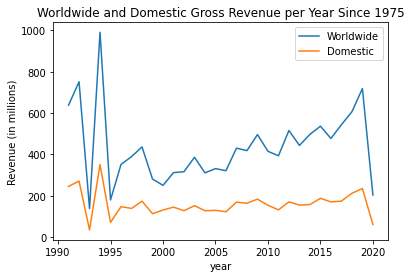

In [ ]:
# Plot 1: Look at Released & Year features for a better understanding
# First we group the year feature by worldwide revneue, then take the average of each year
# Divide by 1,000,000 to make it easier to see

# Prepare plot data
t2 = df.groupby("year").agg("Worldwide Gross").mean().to_frame() 
t2["Domestic Gross"] = df.groupby("year").agg("Domestic Gross").mean()
t2 = t2[t2.index>1990] 
fg2, ax2 = plt.subplots(1,1)

# Prepare plot
ax2.plot(t2.index, t2["Worldwide Gross"] / 1000000,label="Worldwide") 
ax2.plot(t2.index, t2["Domestic Gross"] / 1000000,label="Domestic")
ax2.set_xlabel("year")
ax2.set_ylabel("Revenue (in millions)")
ax2.set_title("Worldwide and Domestic Gross Revenue per Year Since 1975")
ax2.legend() 

In [ ]:
# Looking at the unique values in 'star', 'writer', 'director', & 'company'
print("No.of.unique values star:", len(pd.unique(df2['star'])))
print("No.of.unique values writer:", len(pd.unique(df2['writer'])))
print("No.of.unique values director:", len(pd.unique(df2['director'])))
print("No.of.unique values company:", len(pd.unique(df2['company'])))

No.of.unique values star: 2815
No.of.unique values writer: 4536
No.of.unique values director: 2949
No.of.unique values company: 2386


In [ ]:
# Carry out df modifications

# Remove 'released' & 'year'
df.drop(['released'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)

# Remove 'country'
df.drop(['country'], axis=1, inplace=True)

# Remove 'star', 'writer', 'director', & 'company'
df.drop(['star'], axis=1, inplace=True)
df.drop(['writer'], axis=1, inplace=True)
df.drop(['director'], axis=1, inplace=True)
df.drop(['company'], axis=1, inplace=True)

# Remove 'rating'
df.drop(['rating'], axis=1, inplace=True)

The only categorical variable left is 'genre'. 

We think this will be an important predictor because some genres, like action or comedy, are more attrative to a greater base of movie goers than other genres. On the flip side, this also means more production companies try to make movies in this genre and the field becomes diluted with low-quality films. 

In [ ]:
##Now that we have removed the unused varables, we can view our df to ensure it is set to create dummies
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 10000 B.C. to xXx: Return of Xander Cage
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Production Budget  632 non-null    float64
 1   Domestic Gross     632 non-null    float64
 2   Worldwide Gross    632 non-null    float64
 3   genre              504 non-null    object 
 4   score              504 non-null    float64
 5   votes              504 non-null    float64
 6   budget             496 non-null    float64
 7   gross              503 non-null    float64
 8   runtime            503 non-null    float64
dtypes: float64(8), object(1)
memory usage: 49.4+ KB


In [ ]:
#Getting dummies for genre 
df = pd.get_dummies(df, columns=['genre'])

In [ ]:
#Making biography movies the intercept
df.drop(['genre_Biography'],axis=1, inplace=True)

In [ ]:
#Check for missing values
df.isnull().sum() 

Production Budget      0
Domestic Gross         0
Worldwide Gross        0
score                128
votes                128
budget               136
gross                129
runtime              129
genre_Action           0
genre_Adventure        0
genre_Animation        0
genre_Comedy           0
genre_Crime            0
genre_Drama            0
genre_Family           0
genre_Horror           0
genre_Mystery          0
genre_Romance          0
dtype: int64

We still have a number of missing values for the  'genre', score', 'votes', 'budget', 'gross [revenue]' and 'runtime'. To handle this, we have preformed the following operations below

*  Score: Filled the blanks with the median value of the column.
*  Votes: Filled the blanks with the median value of the column.
*  Gross: Filled the blanks with the mean value of the column.
*  Runtime: Filled the blanks with the mean value of the column.
*  Budget: Filled the blanks with the mean value of the column.


In [ ]:
#score: Replace with median
df["score"].fillna(df["score"].median(skipna=True), inplace=True)  

#votes: Replace with median
df["votes"].fillna(df["votes"].median(skipna=True), inplace=True)   

#gross: Replace with average
df["gross"].fillna(df["gross"].mean(skipna=True), inplace=True)   

#runtime: Replace with average
df["runtime"].fillna(df["runtime"].mean(skipna=True), inplace=True)   

#Budget: Replace with average 
df["budget"].fillna(df["budget"].mean(skipna=True), inplace=True)   

In [ ]:
# check for missing values-- now there are none! 
df.isnull().sum()  

Production Budget    0
Domestic Gross       0
Worldwide Gross      0
score                0
votes                0
budget               0
gross                0
runtime              0
genre_Action         0
genre_Adventure      0
genre_Animation      0
genre_Biography      0
genre_Comedy         0
genre_Crime          0
genre_Drama          0
genre_Family         0
genre_Horror         0
genre_Mystery        0
genre_Romance        0
dtype: int64

**Domestic Gross**: Now that our dataset is clean, we can first attempt to figure out if the varables we have chosen will predict the domestic gross budget. 

To do so, we need to drop the domestic gross budget from our dataset, make it our independent varable, train the model with 70% of the data, and then test it against the remaining 30% of the data. 

In [ ]:
#Dropping 'Domestic Gross' from the dataset
X = df.drop('Domestic Gross', axis=1)
X.shape

(632, 18)

In [ ]:
#Adding 'Domestic Gross' as the independent varable
Y = df['Domestic Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Training the model
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [-1.13904911e-01  3.64662101e-01  7.77484077e+05  7.24791193e+01
  1.23596690e-01 -7.10536279e-02 -5.26664906e+05 -1.23864328e+07
 -1.18502865e+07 -1.42853493e+07 -2.81317780e+06  1.22056084e+07
 -2.10873341e+06 -8.63045458e+05  1.21071935e-08 -2.87128383e+07
 -3.85753798e+07 -3.10245944e+07]
Model intercept: 72531511.81140126


In [ ]:
#testing the model against the 30% unused data
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(3)

,index,Production Budget,Worldwide Gross,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,...,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Horror,genre_Mystery,genre_Romance,Domestic Gross,predicted
0,10000 B.C.,105000000.0,269065678.0,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,...,0,0,0,0,0,0,0,0,94784201.0,1.578314e+08
1,1917,100000000.0,370603379.0,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,...,0,0,0,1,0,0,0,0,159227644.0,3.665941e+07
2,A Good Day to Die Hard,92000000.0,304249198.0,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,1,0,...,0,0,0,0,0,0,0,0,67349198.0,1.974758e+07


In [ ]:
#Testing the varability in the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

36363260.74401969

**Conclusion**: It turns out that domestically, the set of variables we have included is not a great predictor of revenue. This could be for several reasons. 

First, the complete dataset we were able to compile was relatively small. Even though our base dataset had nearly 8,000 rows, our complete dataset with budget and revenues was only under 200 values. This small dataset amplifies any correlary features and would hurt the predictive power of the linear equation. Second, this model does not incorporate some of the most important information regarding the writer, director, and stars of the movie. These features have potentially huge implications in the revenues of a film, but beceause of the large number of unqiue values in these columns, we were unable to incoroprate them into this analysis and lost some of their important predictive power. Finally, stochastic factors may be impacting this dataset that are unable to be properly managed or discoverd in this analysis.

**Worldwide Gross** Repeating the same steps as above with worldwide gross revenue 

In [ ]:
#Dropping 'Worldwide Gross' from the dataset
X = df.drop('Worldwide Gross', axis=1)
X.shape

(632, 17)

In [ ]:
#Adding 'Worldwide Gross' as the independent varable
Y = df['Worldwide Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Training the model
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [ 1.01410987e+00  1.87909123e+00 -4.10542796e+06 -1.25432036e+02
 -1.01785853e+00  4.35866338e-01  9.28950753e+05  5.19917793e+07
  5.98344774e+07  5.85353680e+07  3.21704231e+06  3.09348450e+07
  2.23409583e+07 -9.31322575e-09  8.17660045e+07  1.10109016e+08
  1.09631825e+08]
Model intercept: -141742370.35837662


In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
y_model = model.predict(Xtest)

In [ ]:
#testing the model against the 30% unused data
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,Production Budget,Domestic Gross,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Horror,genre_Mystery,genre_Romance,Worldwide Gross,predicted
0,10000 B.C.,105000000.0,94784201.0,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,0,0,0,0,0,0,0,0,2.690657e+08,5.391361e+08
1,1917,100000000.0,159227644.0,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,0,0,0,1,0,0,0,0,3.706034e+08,8.793979e+07
2,A Good Day to Die Hard,92000000.0,67349198.0,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,1,0,0,0,0,0,0,0,0,0,3.042492e+08,1.167862e+08
3,After Earth,130000000.0,60522097.0,4.8,194000.0,1.300000e+08,2.436120e+08,100.000000,1,0,0,0,0,0,0,0,0,0,2.514997e+08,1.558231e+08
4,Aladdin,182000000.0,355559216.0,6.9,239000.0,1.830000e+08,1.050694e+09,128.000000,0,1,0,0,0,0,0,0,0,0,1.046650e+09,2.784833e+08


In [ ]:
#Testing the varability in the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

72765668.79446647

**Conclusion**: This model suggests that the list of dummy and numeric variables in this model are actually worse at prediciting gross worldwide revenue. 

While this certinaly has to do with the items dicussed above, additional factors also may help to illuminate why this model did an even worse job than domestic revenue. 

Movies made in the Untied States often times rely on social themes and tropes that when translated into other langagues and cultures may not be applicable. This factor makes predicting worldwide revenue even more difficult. 

# **Linear Regression: Can We Use Rating to Predict Movie Revenue?**

These regressions are simliar to the ones above, except that we have created dummy variables for the different ratings, and dropped the 'genre' dummy. 


In [ ]:
##BEGIN DATA PREPARATION AND CLEANING##

df = df1.join(df2)
#Then drop "Rank" and "Release Date" from the new dataframe, because they are not necessary for our analysis 

df = df.drop(columns=["Rank","Release Date"])

#Then debug the "Domestic Gross" & "Worldwide Gross" columns. 
#They have several characters that needed to be removed (\xa0)
#Then change their data type to be float

df["Domestic Gross"]=df["Domestic Gross"].str.replace("\xa0", "").astype(float)
df["Worldwide Gross"]=df["Worldwide Gross"].str.replace("\xa0", "").astype(float)
df["Production Budget"]=df["Production Budget"].astype(float)
##END DATA PREPARATION AND CLEANING##

In [ ]:
#just for ease of reading the code, this regression will have an updated df name, but it is the same dataset. 
df_rating = df

In [ ]:
#Remove 'Released' & 'Year'
df_rating.drop(['released'], axis=1, inplace=True)
df_rating.drop(['year'], axis=1, inplace=True)

#Remove 'country'
df_rating.drop(['country'], axis=1, inplace=True)

#Remove 'star', 'writer', 'director', & 'company'
df_rating.drop(['star'], axis=1, inplace=True)
df_rating.drop(['writer'], axis=1, inplace=True)
df_rating.drop(['director'], axis=1, inplace=True)
df_rating.drop(['company'], axis=1, inplace=True)

#Remove 'genre'
df_rating.drop(['genre'], axis=1, inplace=True)

In [ ]:
##Now that we have removed the unused varables, we can view our df to ensure it is set to create dummies
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 10000 B.C. to xXx: Return of Xander Cage
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Production Budget  632 non-null    float64
 1   Domestic Gross     632 non-null    float64
 2   Worldwide Gross    632 non-null    float64
 3   rating             504 non-null    object 
 4   score              504 non-null    float64
 5   votes              504 non-null    float64
 6   budget             496 non-null    float64
 7   gross              503 non-null    float64
 8   runtime            503 non-null    float64
dtypes: float64(8), object(1)
memory usage: 49.4+ KB


We think that movies with higher ratings (like PG-13 and R) will have lower revenue because they are available to a smaller audience. 

In [ ]:
#Getting dummies for rating 
df_rating = pd.get_dummies(df_rating, columns=['rating'])

In [ ]:
#Making g-rated movies the intercept
df_rating.drop(['rating_G'],axis=1, inplace=True)

In [ ]:
#Check for missing values
df_rating.isnull().sum() 

Production Budget      0
Domestic Gross         0
Worldwide Gross        0
score                128
votes                128
budget               136
gross                129
runtime              129
rating_PG              0
rating_PG-13           0
rating_R               0
rating_TV-MA           0
dtype: int64

We still have a number of missing values for the score', 'votes', 'budget', 'gross [revenue]' and 'runtime'. To handle this, we have preformed the following operations below

*  Score: Filled the blanks with the median value of the column.
*  Votes: Filled the blanks with the median value of the column.
*  Gross: Filled the blanks with the mean value of the column.
*  Runtime: Filled the blanks with the mean value of the column.
*  Budget: Filled the blanks with the mean value of the column.

In [ ]:
#score: Replace with median
df_rating["score"].fillna(df_rating["score"].median(skipna=True), inplace=True)  

#votes: Replace with median
df_rating["votes"].fillna(df_rating["votes"].median(skipna=True), inplace=True)   

#gross: Replace with average
df_rating["gross"].fillna(df_rating["gross"].mean(skipna=True), inplace=True)   

#runtime: Replace with average  
df_rating["runtime"].fillna(df_rating["runtime"].mean(skipna=True), inplace=True)  

#Budget: Replace with average 
df_rating["budget"].fillna(df_rating["budget"].mean(skipna=True), inplace=True) 

In [ ]:
# check for missing values-- now there are none! 
df_rating.isnull().sum()  

Production Budget    0
Domestic Gross       0
Worldwide Gross      0
score                0
votes                0
budget               0
gross                0
runtime              0
rating_PG            0
rating_PG-13         0
rating_R             0
rating_TV-MA         0
dtype: int64

**Domestic Gross**: Now that our dataset is clean, we can first attempt to figure out if the variables we have chosen will predict the domestic gross budget.

To do so, we need to drop the domestic gross budget from our dataset, make it our independent varable, train the model with 70% of the data, and then test it against the remaining 30% of the data.

In [ ]:
#Dropping 'Domestic Gross' from the dataset
X = df_rating.drop('Domestic Gross', axis=1)
X.shape

(632, 11)

In [ ]:
#Adding 'Domestic Gross' as the independent varable
Y = df_rating['Domestic Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [-1.42181191e-01  3.65873336e-01  9.74962745e+05  7.25547350e+01
  1.30372916e-01 -7.77408974e-02 -3.85679136e+05 -9.71304810e+06
 -1.13739113e+07 -2.05678847e+07 -6.79813088e+07]
Model intercept: 60234200.71669087


In [ ]:
#testing the model against the 30% unused data
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,Production Budget,Worldwide Gross,score,votes,budget,gross,runtime,rating_PG,rating_PG-13,rating_R,rating_TV-MA,Domestic Gross,predicted
0,10000 B.C.,105000000.0,2.690657e+08,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,0,0,94784201.0,1.580541e+08
1,1917,100000000.0,3.706034e+08,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,1,0,159227644.0,3.024200e+07
2,A Good Day to Die Hard,92000000.0,3.042492e+08,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,0,0,1,0,67349198.0,2.619055e+07
3,After Earth,130000000.0,2.514997e+08,4.8,194000.0,1.300000e+08,2.436120e+08,100.000000,0,1,0,0,60522097.0,9.655994e+07
4,Aladdin,182000000.0,1.046650e+09,6.9,239000.0,1.830000e+08,1.050694e+09,128.000000,1,0,0,0,355559216.0,7.993938e+07


In [ ]:
#Testing the varability in the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

37518409.32658062

**Worldwide Gross**: Repeating the same steps as above with worldwide gross revenue.

In [ ]:
#Dropping 'Worldwide Gross' from the dataset
X = df_rating.drop('Worldwide Gross', axis=1)
X.shape

(632, 11)

In [ ]:
#Adding 'Worldwide Gross' as the independent varable
Y = df_rating['Worldwide Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Training the model
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
#seeing how good the model works by examininig the coeficients and intercptes 
y_model = model.predict(Xtest)
mean_absolute_error(ytest, y_model)

Model coefficients: [ 1.09692844e+00  1.87732870e+00 -4.04231446e+06 -1.25369252e+02
 -1.05323826e+00  4.52883465e-01  4.07949291e+05  4.09476754e+07
  4.95322956e+07  6.97176731e+07  2.16414969e+08]
Model intercept: -92103354.23710763


76190130.00880744

In [ ]:
#testing the model against the 30% unused data
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,Production Budget,Domestic Gross,score,votes,budget,gross,runtime,rating_PG,rating_PG-13,rating_R,rating_TV-MA,Worldwide Gross,predicted
0,10000 B.C.,105000000.0,94784201.0,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,0,0,2.690657e+08,5.414814e+08
1,1917,100000000.0,159227644.0,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,1,0,3.706034e+08,1.046838e+08
2,A Good Day to Die Hard,92000000.0,67349198.0,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,0,0,1,0,3.042492e+08,1.000963e+08
3,After Earth,130000000.0,60522097.0,4.8,194000.0,1.300000e+08,2.436120e+08,100.000000,0,1,0,0,2.514997e+08,1.412123e+08
4,Aladdin,182000000.0,355559216.0,6.9,239000.0,1.830000e+08,1.050694e+09,128.000000,1,0,0,0,1.046650e+09,2.798166e+08


**Overall, neither rating or genre alone does a great job of predicting worldwide or domestic revenue**

#Linear Regression: Putting Rating and Genre Together to predict Revenue
While neither rating or genre is itself a predictor of worldwide or domestic revenue, we performed two more regressions with dummy varables for genre *`and`* rating, to see if the predictive power increaes. 

We will handle all the other varables in the same way as before, but have created a new df called 'df_both'




In [ ]:
##BEGIN DATA PREPARATION AND CLEANING##

df = df1.join(df2)
#Then drop "Rank" and "Release Date" from the new dataframe, because they are not necessary for our analysis 

df = df.drop(columns=["Rank","Release Date"])

#Then debug the "Domestic Gross" & "Worldwide Gross" columns. 
#They have several characters that needed to be removed (\xa0)
#Then change their data type to be float

df["Domestic Gross"]=df["Domestic Gross"].str.replace("\xa0", "").astype(float)
df["Worldwide Gross"]=df["Worldwide Gross"].str.replace("\xa0", "").astype(float)
df["Production Budget"]=df["Production Budget"].astype(float)
##END DATA PREPARATION AND CLEANING##

In [ ]:
df_both = df

In [ ]:
#Remove 'Released' & 'Year'
df_both.drop(['released'], axis=1, inplace=True)
df_both.drop(['year'], axis=1, inplace=True)

#Remove 'country'
df_both.drop(['country'], axis=1, inplace=True)

#Remove 'star', 'writer', 'director', & 'company'
df_both.drop(['star'], axis=1, inplace=True)
df_both.drop(['writer'], axis=1, inplace=True)
df_both.drop(['director'], axis=1, inplace=True)
df_both.drop(['company'], axis=1, inplace=True)

In [ ]:
##Now that we have removed the unused varables, we can view our df to ensure it is set to create dummies
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 10000 B.C. to xXx: Return of Xander Cage
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Production Budget  632 non-null    float64
 1   Domestic Gross     632 non-null    float64
 2   Worldwide Gross    632 non-null    float64
 3   rating             504 non-null    object 
 4   genre              504 non-null    object 
 5   score              504 non-null    float64
 6   votes              504 non-null    float64
 7   budget             496 non-null    float64
 8   gross              503 non-null    float64
 9   runtime            503 non-null    float64
dtypes: float64(8), object(2)
memory usage: 54.3+ KB


In [ ]:
#Getting dummies for genre 
df_both = pd.get_dummies(df_both, columns=['genre'])

In [ ]:
#Making biography movies the intercept
df_both.drop(['genre_Biography'],axis=1, inplace=True)

In [ ]:
#Getting dummies for rating 
df_both = pd.get_dummies(df_both, columns=['rating'])

In [ ]:
#Making biography movies the intercept
df_both.drop(['rating_G'],axis=1, inplace=True)

In [ ]:
#Check for missing values
df_both.isnull().sum() 

Production Budget      0
Domestic Gross         0
Worldwide Gross        0
score                128
votes                128
budget               136
gross                129
runtime              129
genre_Action           0
genre_Adventure        0
genre_Animation        0
genre_Comedy           0
genre_Crime            0
genre_Drama            0
genre_Family           0
genre_Horror           0
genre_Mystery          0
genre_Romance          0
rating_PG              0
rating_PG-13           0
rating_R               0
rating_TV-MA           0
dtype: int64

In [ ]:
#score: Replace with median
df_both["score"].fillna(df_both["score"].median(skipna=True), inplace=True)  

#votes: Replace with median
df_both["votes"].fillna(df_both["votes"].median(skipna=True), inplace=True)   

#gross: Replace with average
df_both["gross"].fillna(df_both["gross"].mean(skipna=True), inplace=True)   

#runtime: Replace with average
df_both["runtime"].fillna(df_both["runtime"].mean(skipna=True), inplace=True)   

#Budget: Replace with average 
df_both["budget"].fillna(df_both["budget"].mean(skipna=True), inplace=True)   

In [ ]:
# check for missing values-- now there are none! 
df_both.isnull().sum() 

Production Budget    0
Domestic Gross       0
Worldwide Gross      0
score                0
votes                0
budget               0
gross                0
runtime              0
genre_Action         0
genre_Adventure      0
genre_Animation      0
genre_Comedy         0
genre_Crime          0
genre_Drama          0
genre_Family         0
genre_Horror         0
genre_Mystery        0
genre_Romance        0
rating_PG            0
rating_PG-13         0
rating_R             0
rating_TV-MA         0
dtype: int64

**Domestic Gross**

In [ ]:
#Dropping 'Domestic Gross' from the dataset
X = df_both.drop('Domestic Gross', axis=1)
X.shape

(632, 21)

In [ ]:
#Adding 'Domestic Gross' as the independent varable
Y = df_both['Domestic Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [-1.36764757e-01  3.67002398e-01  1.78329700e+06  7.21352622e+01
  1.42324142e-01 -7.77776356e-02 -4.51523033e+05  5.81403002e+06
  1.44216978e+06 -3.84752126e+06  2.76239150e+07  1.62580799e+07
  1.51315942e+07  2.79396772e-08 -3.93506902e+06 -2.23120357e+07
 -1.24300382e+07 -1.20940946e+07 -1.80367091e+07 -2.67399001e+07
 -6.76413194e+07]
Model intercept: 60441267.78208348


In [ ]:
#testing the model against the 30% unused data
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,Production Budget,Worldwide Gross,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,...,genre_Family,genre_Horror,genre_Mystery,genre_Romance,rating_PG,rating_PG-13,rating_R,rating_TV-MA,Domestic Gross,predicted
0,10000 B.C.,105000000.0,2.690657e+08,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,...,0,0,0,0,0,0,0,0,94784201.0,1.584764e+08
1,1917,100000000.0,3.706034e+08,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,...,0,0,0,0,0,0,1,0,159227644.0,2.895699e+07
2,A Good Day to Die Hard,92000000.0,3.042492e+08,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,1,0,...,0,0,0,0,0,0,1,0,67349198.0,2.232437e+07
3,After Earth,130000000.0,2.514997e+08,4.8,194000.0,1.300000e+08,2.436120e+08,100.000000,1,0,...,0,0,0,0,0,1,0,0,60522097.0,9.635273e+07
4,Aladdin,182000000.0,1.046650e+09,6.9,239000.0,1.830000e+08,1.050694e+09,128.000000,0,1,...,0,0,0,0,1,0,0,0,355559216.0,8.003282e+07


In [ ]:
#Testing the varability in the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

36699707.55260706

**Worldwide Revenue**

In [ ]:
#Dropping 'Worldwide Gross' from the dataset
X = df_both.drop('Worldwide Gross', axis=1)
X.shape

(632, 21)

In [ ]:
#Adding 'Worldwide Gross' as the independent varable
Y = df_both['Worldwide Gross']
Y.shape

(632,)

In [ ]:
#Setting up the regression
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=833)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#seeing how good the model works by examininig the coeficients and intercptes 
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [ 1.06373229e+00  1.87645126e+00 -6.55357211e+06 -1.26004274e+02
 -1.05642557e+00  4.48813019e-01  6.95543047e+05 -2.44594578e+06
  2.51032091e+07  3.18221932e+07 -4.00557592e+07 -2.29924165e+07
 -2.44657813e+07 -4.13856469e-08  1.26454060e+07  6.01934624e+07
  5.10590187e+07  2.87325211e+07  5.56314373e+07  7.46117111e+07
  1.99836776e+08]
Model intercept: -106935337.44296879


In [ ]:
#testing the model against the 30% unused data
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,Production Budget,Domestic Gross,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,...,genre_Family,genre_Horror,genre_Mystery,genre_Romance,rating_PG,rating_PG-13,rating_R,rating_TV-MA,Worldwide Gross,predicted
0,10000 B.C.,105000000.0,94784201.0,6.6,229000.0,1.313048e+08,4.247876e+08,119.644135,0,0,...,0,0,0,0,0,0,0,0,2.690657e+08,5.370146e+08
1,1917,100000000.0,159227644.0,8.3,473000.0,9.500000e+07,3.846236e+08,119.000000,0,0,...,0,0,0,0,0,0,1,0,3.706034e+08,1.060550e+08
2,A Good Day to Die Hard,92000000.0,67349198.0,5.3,201000.0,9.200000e+07,3.046542e+08,98.000000,1,0,...,0,0,0,0,0,0,1,0,3.042492e+08,1.105310e+08
3,After Earth,130000000.0,60522097.0,4.8,194000.0,1.300000e+08,2.436120e+08,100.000000,1,0,...,0,0,0,0,0,1,0,0,2.514997e+08,1.488992e+08
4,Aladdin,182000000.0,355559216.0,6.9,239000.0,1.830000e+08,1.050694e+09,128.000000,0,1,...,0,0,0,0,1,0,0,0,1.046650e+09,2.759623e+08


In [ ]:
#Testing the varability in the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

73305149.28111294

# **Conclusion:** 
When taken together, the genre and rating provide better predictive power than alone. However, these variables are still not very accurate predictors of domestic and worldwide revenue, with mean absolute errors in the millions of dollars. To be sure, this is a lot of money, but when taken in conext with the production budget of movies, and the total gross revenues topping out in the billions, this difference may not actually be that important. An interesting extension would be to gain specific informtion on the actual costs of these movies, and use that data to further understand if the variance we are seeing is actually significant. 


*Prediciting movie revenues is notoriously difficult. With only partial answers to our initial question, our group made an extension, and tried to answer if we could predict how good a movie would be, regardless of the revenue it generated*

# **Classification: Can We Predict a Great Movie?**
Question:
- Using logistic regression and the features provided in our data set, can we build a model that will predict whether a movie will receive an IMDB score greater than 7? In other words, can we predict a great movie?!

Approach:
- Review features and clean data
- Run a for loop over the IMDB "score" column, assigning a value of 1 to movies with an IMDB rating >=7 and a 0 to movies with an IMDB rating < 7
- Divide data into test/train splits
- Initiatee and run regresson models over the data to make predictions
- Review results for insights! Are there other questions we want to ask?


In [ ]:
# Load libraries and data to begin analysis

# Initial library imports
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

# Import the movies.csv file
url2 = 'https://raw.githubusercontent.com/nordbynick/IS833D1_GroupProject/main/movies.csv'
df2 = pd.read_csv(url2).set_index("name") 

In [ ]:
# First glance at the data

df2.head(5)

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
Longshot,TV-PG,Comedy,1981,1/1/1980,5.1,101.0,E.W. Swackhamer,Barry Rosen,Leif Garrett,United States,NaN,NaN,Greentree,100.0
Five Days One Summer,PG,Drama,1982,1/1/1982,6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,15000000.0,199078.0,Cable and Wireless Finance,108.0
Taipei Story,Not Rated,Drama,1985,1/1/1985,7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0
O.C. and Stiggs,R,Comedy,1985,1/1/1985,5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7000000.0,29815.0,Metro-Goldwyn-Mayer (MGM),109.0
The House on Carroll Street,PG,Thriller,1987,1/1/1987,6.1,2300.0,Peter Yates,Walter Bernstein,Kelly McGillis,United States,14000000.0,459824.0,Orion Pictures,101.0


In [ ]:
# Look at the data types and check for nulls and/or missing entries

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, Longshot to The Wolfman
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7591 non-null   object 
 1   genre     7668 non-null   object 
 2   year      7668 non-null   int64  
 3   released  7666 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   float64
 6   director  7668 non-null   object 
 7   writer    7665 non-null   object 
 8   star      7667 non-null   object 
 9   country   7665 non-null   object 
 10  budget    5497 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7651 non-null   object 
 13  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 898.6+ KB


In [ ]:
# Remove features that are not important

# Released: Release year will not help in predicting the rating of future movies
df2 = df2.drop(['released'], axis=1)

# Year: Similar to released, the year feature is not helpful in predicting the rating of future movies
df2 = df2.drop(['year'], axis=1)

# Gross: Gross revenue is the result of a great movie, not a predictor
df2 = df2.drop(['gross'], axis=1)

In [ ]:
# Further analysis on null values, how will we want to handle?

df2.isnull().sum()

rating        77
genre          0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
company       17
runtime        4
dtype: int64

In [ ]:
# We will address the features with null values in the following way...
# Rating: Replace with the most common value, there are relatively few null values here, so the impact will be limited
# Score: Drop null values, this is the target we will be solving for, so we do not want to fabricate data
# Votes: Fill with the median number of votes, there are relatively few null values here, so the impact will be limited
# Writer: Drop null values, there is a limited number of nulls and "writer" is a unique piece of data
# Star: Drop null value, there is a single null value, therefore it is an immaterial data point
# Country: Drop null values, there are only three null values here, therefore it is immaterial to drop these data points
# Budget: Drop null values, this is a potentially very important piece of information we do not want to fabricate
# Company: Drop null values, there is a limited number of nulls so the impact will be limited
# Runtime: Fill with median values

df2 = df2.dropna(subset=['company', 'score', 'writer', 'star', 'country', 'budget'])
df2['rating'].fillna(df2['rating'].value_counts().idxmax(), inplace=True)
df2['votes'].fillna(df2['votes'].median(skipna=True), inplace=True)
df2['runtime'].fillna(df2['runtime'].median(skipna=True), inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, Five Days One Summer to Star Trek First Frontier
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    5488 non-null   object 
 1   genre     5488 non-null   object 
 2   score     5488 non-null   float64
 3   votes     5488 non-null   float64
 4   director  5488 non-null   object 
 5   writer    5488 non-null   object 
 6   star      5488 non-null   object 
 7   country   5488 non-null   object 
 8   budget    5488 non-null   float64
 9   company   5488 non-null   object 
 10  runtime   5488 non-null   float64
dtypes: float64(4), object(7)
memory usage: 514.5+ KB


In [ ]:
# Before creating dummies, we will see how many unique values each object oriented feature has

print("No.of.unique values rating:", len(pd.unique(df2['rating'])))
print("No.of.unique values genre:", len(pd.unique(df2['genre'])))
print("No.of.unique values director:", len(pd.unique(df2['director'])))
print("No.of.unique values writer:", len(pd.unique(df2['writer'])))
print("No.of.unique values star:", len(pd.unique(df2['star'])))
print("No.of.unique values country:", len(pd.unique(df2['country'])))
print("No.of.unique values company:", len(pd.unique(df2['company'])))

No.of.unique values rating: 10
No.of.unique values genre: 15
No.of.unique values director: 2101
No.of.unique values writer: 3256
No.of.unique values star: 1891
No.of.unique values country: 52
No.of.unique values company: 1519


In [ ]:
# Given the above data, director, writer, star, and company may be too granular to derive insights from, we will drop these as well

df2 = df2.drop(['director', 'writer', 'star', 'company'], axis=1)
df2.head(5)

,rating,genre,score,votes,country,budget,runtime
name,,,,,,,
Five Days One Summer,PG,Drama,6.1,1000.0,United States,15000000.0,108.0
O.C. and Stiggs,R,Comedy,5.4,1200.0,United States,7000000.0,109.0
The House on Carroll Street,PG,Thriller,6.1,2300.0,United States,14000000.0,101.0
The White Balloon,Unrated,Drama,7.7,6900.0,Iran,150000.0,85.0
Dahmer,R,Biography,5.6,9700.0,United States,250000.0,101.0


In [ ]:
# Now we will use a for loop to create column with binary data, "1" for an IMDB rating >=7 and "0" for IMDB rating <7

result = []
for value in df2['score']:
    if value >= 7:
        result.append(1)
    elif value < 7 and value > 0:
        result.append(0)
    else:
        result.append(0)   
df2["result"] = result   
df2.head(5)

,rating,genre,score,votes,country,budget,runtime,result
name,,,,,,,,
Five Days One Summer,PG,Drama,6.1,1000.0,United States,15000000.0,108.0,0
O.C. and Stiggs,R,Comedy,5.4,1200.0,United States,7000000.0,109.0,0
The House on Carroll Street,PG,Thriller,6.1,2300.0,United States,14000000.0,101.0,0
The White Balloon,Unrated,Drama,7.7,6900.0,Iran,150000.0,85.0,1
Dahmer,R,Biography,5.6,9700.0,United States,250000.0,101.0,0


In [ ]:
# Here we can see the number of movies rated at least 7+

df2['result'].sum()

1584

In [ ]:
# Saving a dataframe here for a later query, please disregard

df_genre = df2.drop(['rating', 'score', 'votes', 'country', 'budget', 'runtime', 'result'], axis=1)

In [ ]:
# Now for the remaining object oriented data, we will get dummies

df2 = pd.get_dummies(df2, prefix="dmy")

In [ ]:
# Reset index and drop "name" column

df2 = df2.reset_index()
df2 = df2.drop(['name'], axis=1)
df2.head(5)

,score,votes,budget,runtime,result,dmy_Approved,dmy_G,dmy_NC-17,dmy_Not Rated,dmy_PG,...,dmy_Spain,dmy_Sweden,dmy_Switzerland,dmy_Taiwan,dmy_Thailand,dmy_United Arab Emirates,dmy_United Kingdom,dmy_United States,dmy_West Germany,dmy_Yugoslavia
0,6.1,1000.0,15000000.0,108.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5.4,1200.0,7000000.0,109.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,6.1,2300.0,14000000.0,101.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,7.7,6900.0,150000.0,85.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.6,9700.0,250000.0,101.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Begin the modelling process

X = df2.drop(['result', 'score'], axis=1)
X.shape

(5488, 80)

In [ ]:
# Target feature

y = df2['result']
y.shape

(5488,)

In [ ]:
# Split data for modelling 

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [ ]:
# Import the desired model to be used and instantiate

from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(solver='liblinear')       

In [ ]:
# Fit the model

model.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
# Make predictions

y_model = model.predict(Xtest)

In [ ]:
# Now that we have predictions, merge the data frames 

test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(5)

,index,votes,budget,runtime,dmy_Approved,dmy_G,dmy_NC-17,dmy_Not Rated,dmy_PG,dmy_PG-13,...,dmy_Switzerland,dmy_Taiwan,dmy_Thailand,dmy_United Arab Emirates,dmy_United Kingdom,dmy_United States,dmy_West Germany,dmy_Yugoslavia,result,predicted
0,1755,1900.0,500000.0,88.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1795,30000.0,25000000.0,133.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,460,16000.0,14000000.0,103.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2369,120000.0,100000000.0,130.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,102,1300.0,12000000.0,78.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Review the model's performance by looking at accuracy

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7455980570734669

In [ ]:
# Now we will look at feature importance by examining coefficients

importance = model.coef_[0]
coefs = pd.DataFrame(importance, columns=['Coefficients'], index=Xtrain.columns)
coefs.sort_values(by=['Coefficients'], ascending=False).head(5)

,Coefficients
votes,1.034636e-05
dmy_Biography,2.342792e-11
dmy_Animation,1.344197e-11
dmy_South Korea,1.736531e-12
dmy_Japan,1.642604e-12


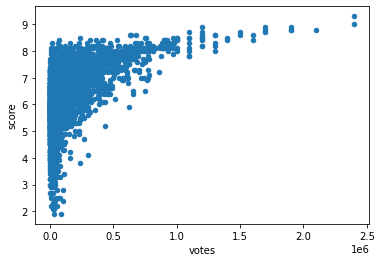

In [ ]:
# In the above table, it is clear that the votes feature has the greatest impact on IMDB score, so, let's explore that relationship through a visualisation

df2.plot.scatter(x='votes', y='score')

In [ ]:
# What happens if we remove the "votes" feature, then run the model?

X = X.drop(['votes'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
model = LogisticRegression(solver='liblinear')
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(5)
accuracy_score(ytest, y_model)

0.7158469945355191

In [ ]:
# With votes removed, what is the next most influential feature?

importance = model.coef_[0]
coefs = pd.DataFrame(importance, columns=['Coefficients'], index=Xtrain.columns)
coefs.sort_values(by=['Coefficients'], ascending=False).head(5)

,Coefficients
dmy_Biography,6.514213e-17
dmy_Animation,1.075421e-17
dmy_New Zealand,7.539380e-18
dmy_South Korea,6.373588e-18
dmy_India,3.600916e-18


In [ ]:
# Will applying a new type of regression increase accuracy (on the feature set that does not include votes)?

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(5)
accuracy_score(ytest, y_model)

0.7152398299939283

In [ ]:
# Are there any further queries we want to research?
# The next two features with the largest coefficients (reference table above) are both genres: can genre be a good predictor of score?

# Begin data preparation to only look at the relationship between genre and score! Pull the df_genre data from earlier in the notebook
df_genre = df_genre.reset_index()
df_genre = df_genre.drop(['name'], axis=1)
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   5488 non-null   object
dtypes: object(1)
memory usage: 43.0+ KB


In [ ]:
# Get dummies for genre only and assign to X

X = pd.get_dummies(df_genre, prefix="dmy")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   dmy_Action     5488 non-null   uint8
 1   dmy_Adventure  5488 non-null   uint8
 2   dmy_Animation  5488 non-null   uint8
 3   dmy_Biography  5488 non-null   uint8
 4   dmy_Comedy     5488 non-null   uint8
 5   dmy_Crime      5488 non-null   uint8
 6   dmy_Drama      5488 non-null   uint8
 7   dmy_Family     5488 non-null   uint8
 8   dmy_Fantasy    5488 non-null   uint8
 9   dmy_Horror     5488 non-null   uint8
 10  dmy_Mystery    5488 non-null   uint8
 11  dmy_Romance    5488 non-null   uint8
 12  dmy_Sci-Fi     5488 non-null   uint8
 13  dmy_Thriller   5488 non-null   uint8
 14  dmy_Western    5488 non-null   uint8
dtypes: uint8(15)
memory usage: 80.5 KB


In [ ]:
# Now begin modelling

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
model = LogisticRegression(solver='liblinear')  
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(5)

,index,dmy_Action,dmy_Adventure,dmy_Animation,dmy_Biography,dmy_Comedy,dmy_Crime,dmy_Drama,dmy_Family,dmy_Fantasy,dmy_Horror,dmy_Mystery,dmy_Romance,dmy_Sci-Fi,dmy_Thriller,dmy_Western,result,predicted
0,1755,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1795,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,460,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2369,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,102,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Were we able to make good predictions only using genre data?

accuracy_score(ytest, y_model)

0.7237401335761992

In [ ]:
# Which genres were the best predictors of movie score?

importance = model.coef_[0]
coefs = pd.DataFrame(importance, columns=['Coefficients'], index=Xtrain.columns)
coefs.sort_values(by=['Coefficients'], ascending=False).head(5)

,Coefficients
dmy_Biography,1.475199
dmy_Family,0.638011
dmy_Romance,0.555933
dmy_Drama,0.481003
dmy_Animation,0.408963


In [ ]:
# How many biography, family, and romance movies were considered? 

print(X['dmy_Biography'].sum())
print(X['dmy_Family'].sum())
print(X['dmy_Romance'].sum())

314
4
5


# **Conclusion:**

After running a classification model on our data set, we were able to predict whether or not a movie would receive a 7+ imdb score with 74.6% accuracy. While this proved that our model did have predictive capabilities, we knew we needed to dig further to figure out what features were driving this outcome. Interestingly enough, the number of votes a movie received was the single greatest predictor of a high IMDB score. The more votes, the higher the IMDB score. This may indicate that while there are many factors that go into making a good movie, it is very important for a movie's producers/actors/fundraisers to politic and influence people to vote for movies. Or, it is possible that better movies capture more eyes and beget more votes! It would be interesting to know the time frame in which votes were cast. Outside of the votes feature, a movie's genre also carries some weight in relation to its score, with the biography genre carrying the greatest weight. 

# Report Summary
Perhaps, as to be expected, there is no single 'silver bullet' which can help to preidict the domestic, worldwide, or total revenue of the movie. While several regressions we preformed on rating and genre helped to increase our predicitive ability, the variance in the modeling performed by the regressions was still in the millions of dollars, posing huge issues in crafting true predictions. 

Our most valuable information came in the form of predicting if a movie would perform well as measured by the IMDB score it recieved. While it is true that a littany of immeasurable factors may be working together to create a popular and well reviewed movie, our most critical modeling was able to predict roughly 75% of the time if that movie would be able sucessful. 

# Google Data Stuido

Link to the Google Data Stuido: https://datastudio.google.com/u/0/reporting/43baa665-e388-423f-8791-d20ee109b65f/page/DoMrC/edit 

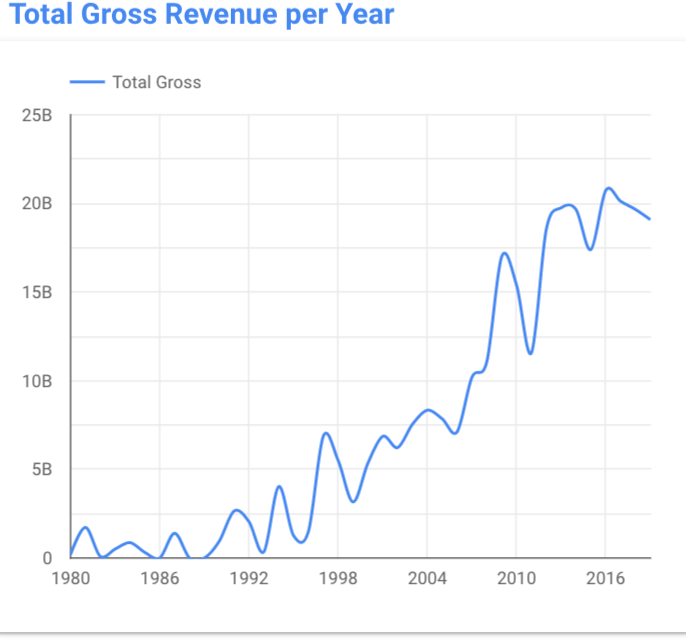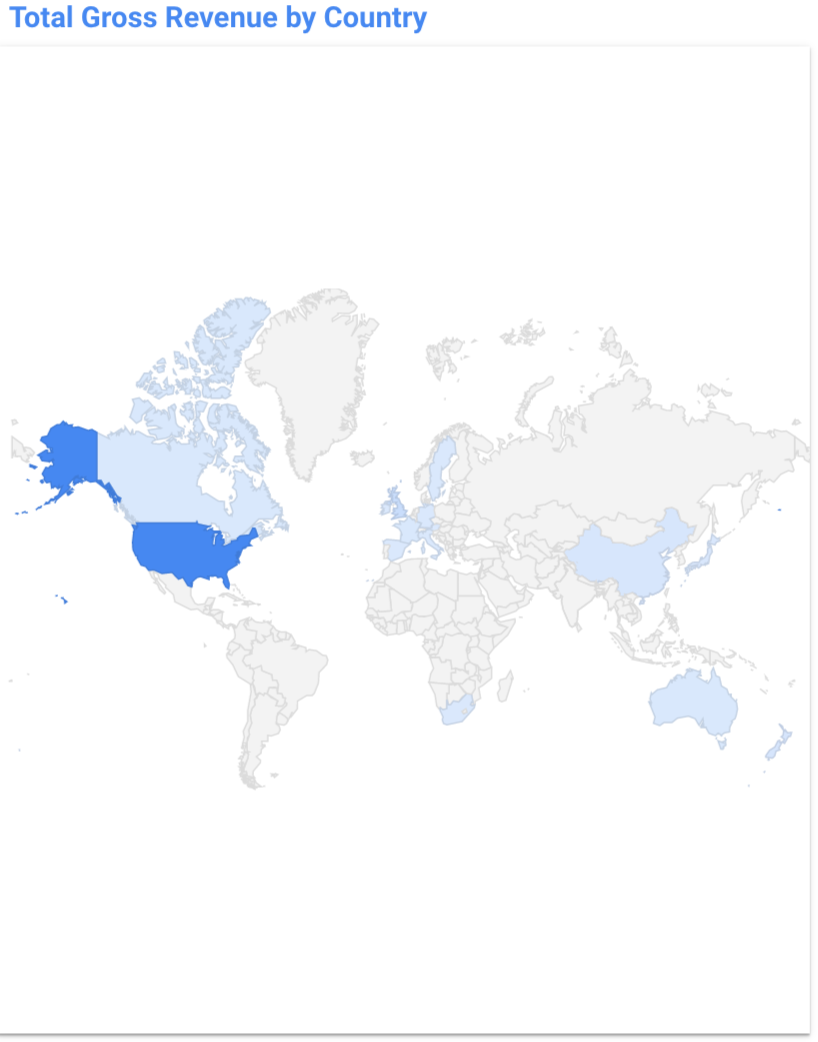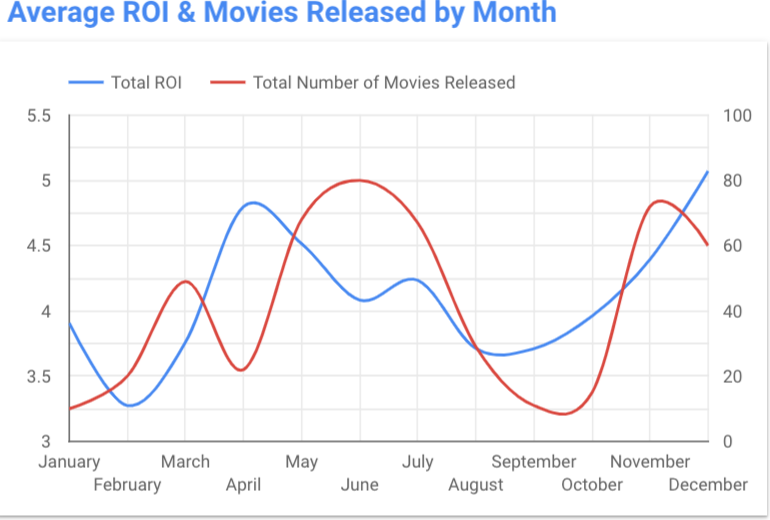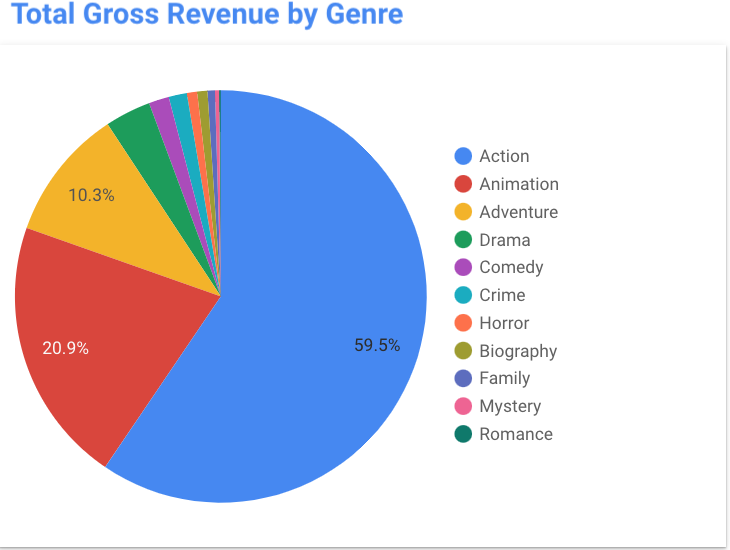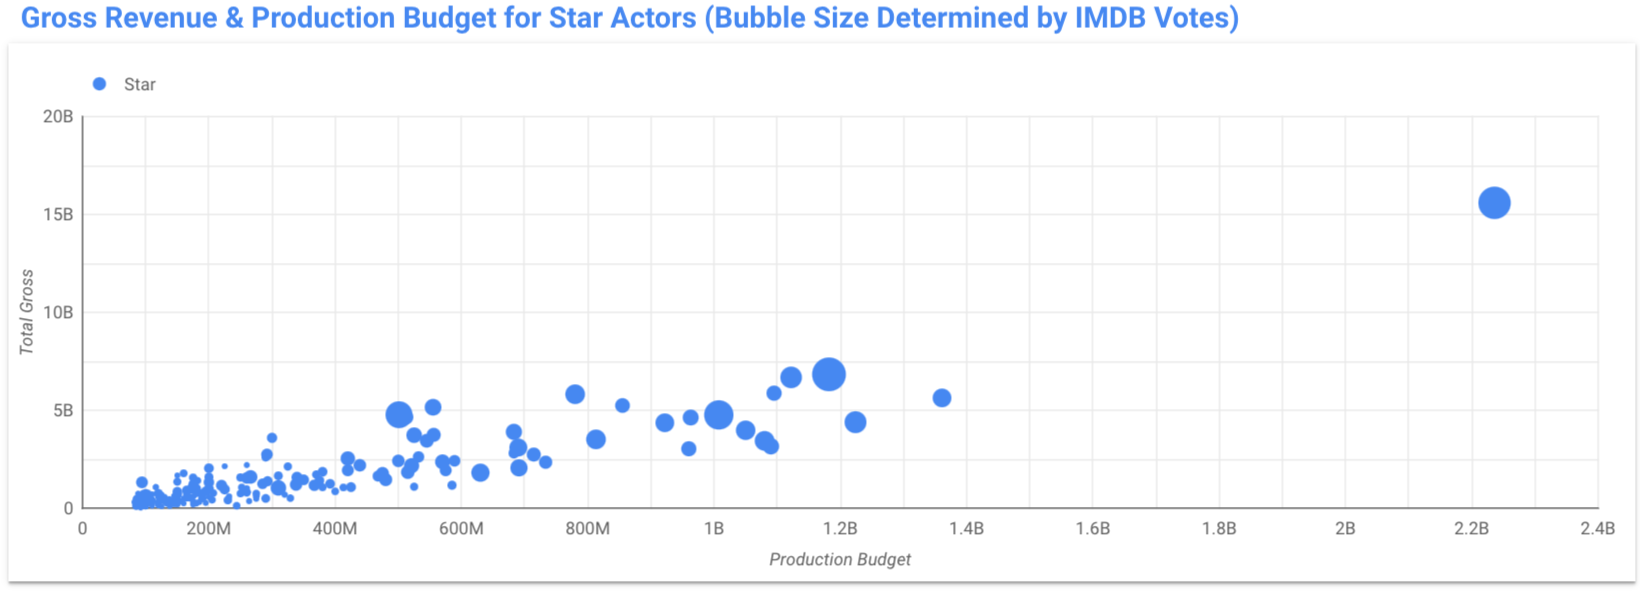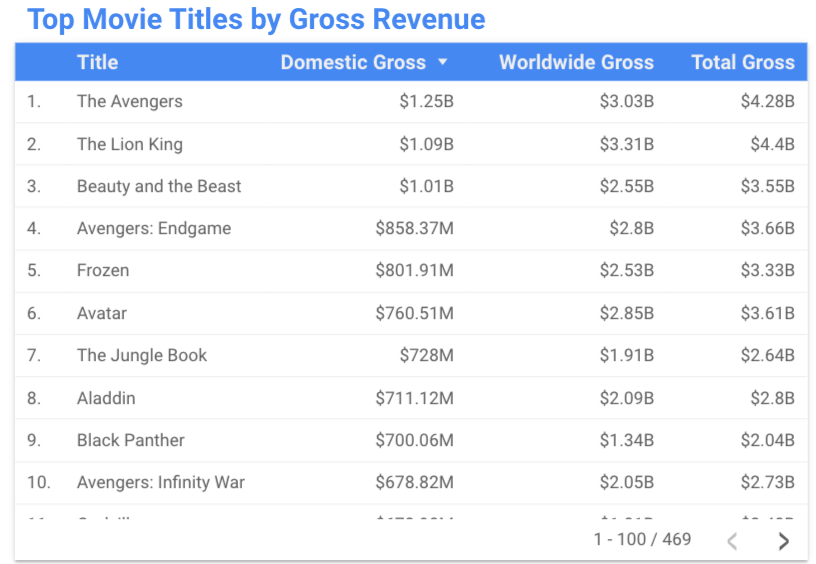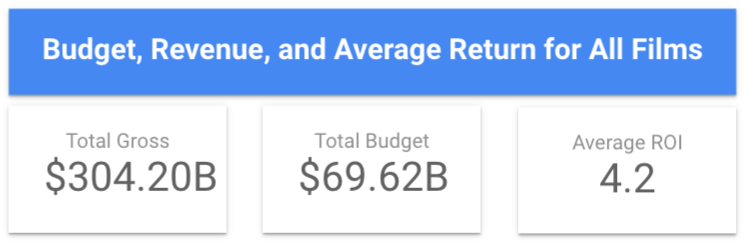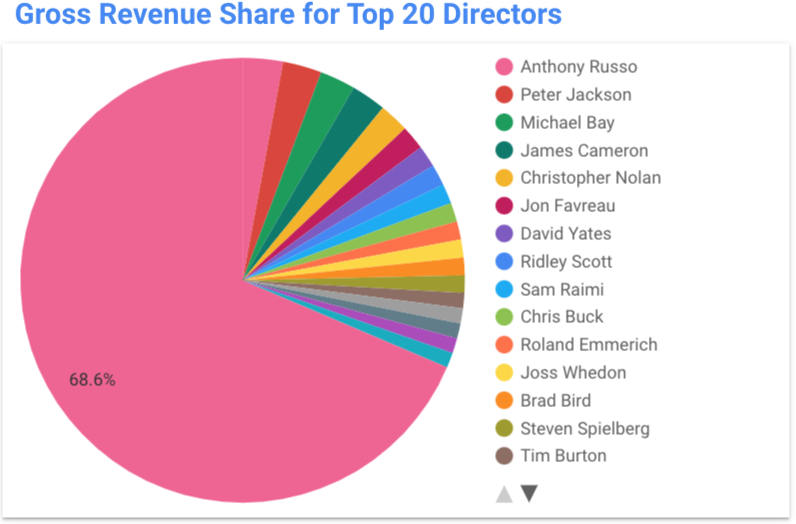